Pair Programming R.Logistica Decision Tree - 5

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :
- Ajustad un modelo de Decision Tree a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [56]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('/content/diabetes_estand.csv', index_col = 0)

In [65]:
df.head(2)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1,0.678427,0.866045,-0.017650,0.928238,-0.784632,0.218695,1.56040
1,0,-0.851320,-1.205066,-0.556276,0.545788,-0.784632,-0.873966,-0.15934


In [59]:
df_estand = df.copy()

# Ajuste del modelo variables estandarizadas 

In [67]:
X1 = df_estand.drop("Outcome", axis = 1)
y1 = df_estand["Outcome"]

In [68]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [69]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

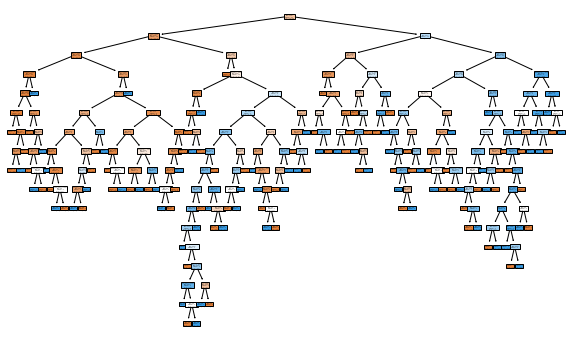

In [70]:
# Con el árbol entrenado, representamos mediante la combinación de las funciones plot_tree(): dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo.
fig = plt.figure(figsize = (10,6))       
tree.plot_tree(arbol, feature_names = x_train1.columns, filled = True)
plt.show()

In [71]:
# max features. => modelo una profudidad máxima de 3. 

max_features = np.sqrt(len(x_train1.columns))
max_features

2.6457513110645907

In [72]:
# max depth => 16

print(arbol.tree_.max_depth)

16


In [73]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

In [74]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    
    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [75]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


=> Tenemos claramente overfitting => debemos disminuir la produndidad del arbol

In [99]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [ 6, 7, 8, 9], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 16. 
        "max_features": [1,2,3],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3. Ponemos como límite el 3 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [20, 40, 60],
        "min_samples_leaf": [20, 40, 60]} 


In [100]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [101]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 7, 8, 9], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [20, 40, 60],
                         'min_samples_split': [20, 40, 60]},
             verbose=-1)

In [102]:
# best_estimator_ para saber cuál de todos los modelos que se han ejecutado es el mejor:
# es aquel que tiene una profundidad de 6, que usa 2 variables predictoras para construir el modelo y que tiene  un min_samples_leaf 10 y un min_samples_split de 50. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=6, max_features=2, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)

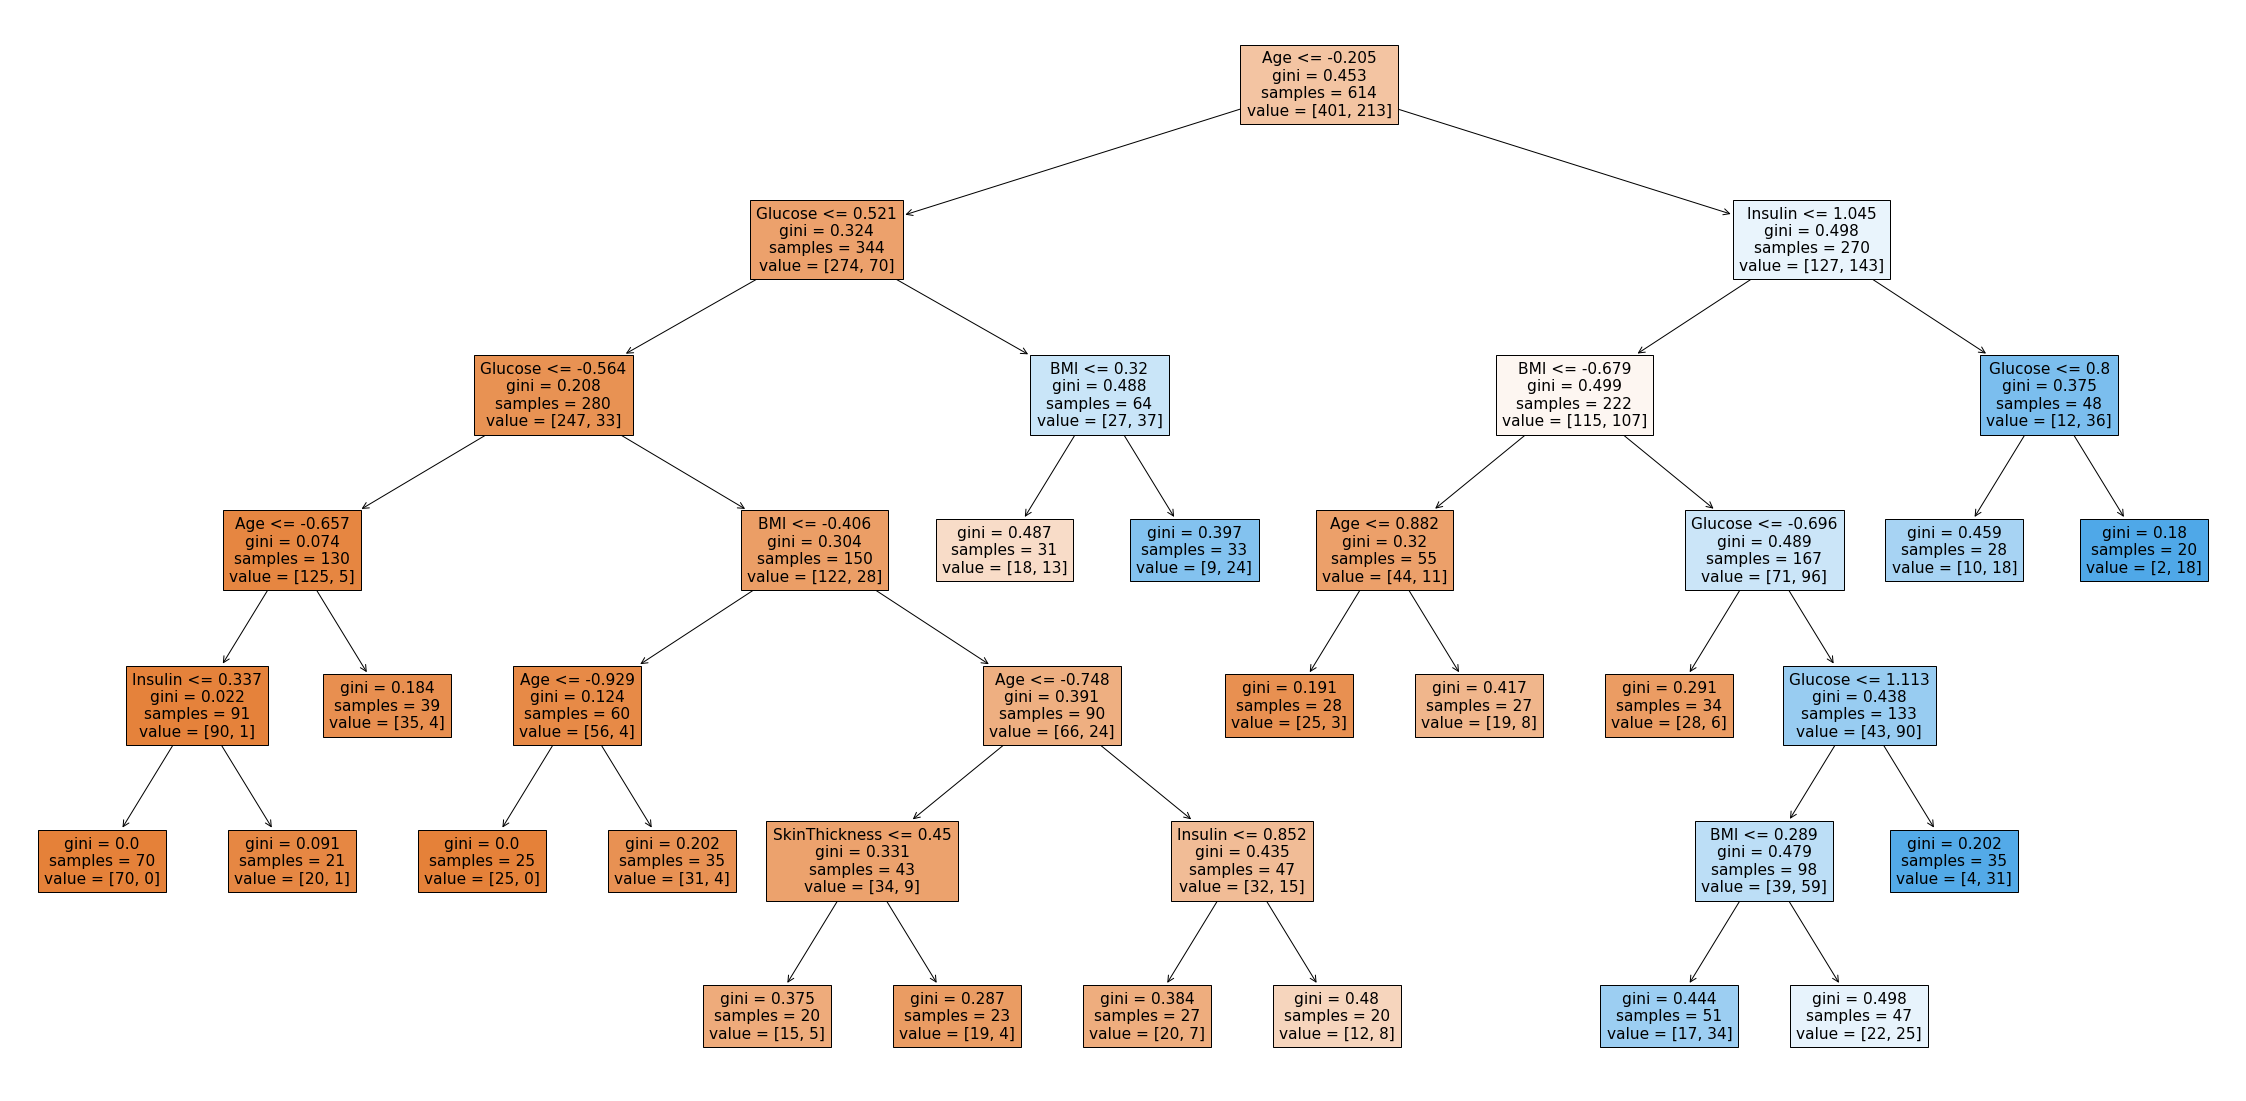

In [103]:
# veamos  nuestro árbol EJECUTAR AL FINAL!!!!!!!!!

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train1.columns, filled=True);

In [104]:
# veamos si nuetro modelo es bueno a predecir:

y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [97]:
# Intento 9
# param_grid={'max_depth': [7, 8, 9], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [30, 50, 70],
#                          'min_samples_split': [30, 50, 70]},


# dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# dt_results2

In [105]:
# Intento 8 : CONCLUSIÖN
# param_grid={'max_depth': [6, 7, 8, 9], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [10, 30, 50],
#                          'min_samples_split': [10, 30, 50]},

dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.707792,0.580645,0.654545,0.615385,0.381139,test,Decision tree Esta II
1,0.793160,0.700935,0.704225,0.702576,0.544026,train,Decision tree Esta II


In [122]:
# Intento 7
# param_grid={'max_depth': [4, 5, 6, 8], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [10, 30, 50],
#                          'min_samples_split': [10, 30, 50]},
# dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.787402,0.840580,0.783784,0.811189,0.568625,test,Decision tree Esta II
1,0.830375,0.807843,0.847737,0.827309,0.660833,train,Decision tree Esta II


In [115]:
# Intento 6
# param_grid={'max_depth': [4, 5, 6], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [30, 50, 70],
#                          'min_samples_split': [30, 50, 70]},


# dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.771654,0.764706,0.878378,0.817610,0.516222,test,Decision tree Esta II
1,0.779093,0.711974,0.905350,0.797101,0.562156,train,Decision tree Esta II


In [98]:
# Intento 5
# # dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# # dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.668831,0.533333,0.581818,0.556522,0.293069,test,Decision tree Esta II
1,0.760586,0.663366,0.629108,0.645783,0.465163,train,Decision tree Esta II


In [88]:
# Intento 4
# dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.649351,0.508475,0.545455,0.526316,0.248509,test,Decision tree Esta II
1,0.796417,0.709524,0.699531,0.704492,0.549224,train,Decision tree Esta II


In [71]:
# Intento 3
# param_grid={'max_depth': [5, 6, 7], 'max_features': [1, 2, 3],
                         #'min_samples_leaf': [0.1, 0.25, 0.35],
                         #'min_samples_split': [0.1, 0.25, 0.35]},


# dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.701299,0.56338,0.727273,0.634921,0.388994,test,Decision tree Esta II
1,0.763844,0.62782,0.784038,0.697286,0.507550,train,Decision tree Esta II


In [65]:
# Intento 2
# param_grid={'max_depth': [4, 6, 8], 'max_features': [1, 2, 3],
                        #  'min_samples_leaf': [10, 50, 100],
                        #  'min_samples_split': [10, 50, 100]},

# dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
# dt_results2


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.649351,0.508475,0.545455,0.526316,0.248509,test,Decision tree Esta II
1,0.796417,0.709524,0.699531,0.704492,0.549224,train,Decision tree Esta II


=> En nuestro caso queremos minimizar los FALSOS POSITIVOS : para eso debemos aumentar la precision, reduciendo la profundidad porque vemos claramente overfitting en el modelo.


In [84]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.668831,0.533333,0.581818,0.556522,0.293069,test,Decision tree Esta II
1,0.760586,0.663366,0.629108,0.645783,0.465163,train,Decision tree Esta II


In [106]:
# cargamos el csv de métricas para comparar cuál de ellos es el mejor

df_logistic_results = pd.read_csv('/content/diabetes_metricas_4.csv', index_col = 0)
df_logistic_results


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta


In [107]:
# concatenamos los df's:
df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta
2,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Esta I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
4,0.668831,0.533333,0.581818,0.556522,0.293069,test,Decision tree Esta II
5,0.760586,0.663366,0.629108,0.645783,0.465163,train,Decision tree Esta II


In [109]:
df_DT_LR_results.to_csv('/content/resultados_diabetes_5_LR_DT.csv')

=> Conclusión: nos quedamos con el Intento 8, en que tenemos un kappa bueno (0.66), la diferencia entre precision y recall es baja (0.04). 

____________________________________________________________________________________________________________________________________________________________

# Ajuste del modelo variables estandarizadas y balanceadas

In [5]:
df = pd.read_csv('/content/diabetes_est_balanc.csv', index_col = 0)

In [6]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
220,-0.851320,-1.665313,0.520975,1.884362,-0.204722,0.156257,-1.064466,0
629,0.799051,1.553114,-0.703000,-1.302720,-0.784632,-1.183749,1.364128,1
521,-0.775619,2.038127,-0.721625,0.598797,-0.560662,0.394261,-0.913922,1


In [111]:
df_eb = df.copy()

In [112]:
# separamos los datos en X e y

X2 = df_eb.drop("Outcome", axis = 1)
y2 = df_eb["Outcome"]

In [113]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [114]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol2 = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol2.fit(x_train2, y_train2)

DecisionTreeClassifier(random_state=0)

In [115]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 3. 

max_features = np.sqrt(len(x_train2.columns))
max_features

2.6457513110645907

In [116]:

# max depth

print(arbol2.tree_.max_depth)

16


In [117]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_eb = arbol2.predict(x_test2)
y_pred_train_eb = arbol2.predict(x_train2)

In [118]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df2 = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df2["modelo"] = modelo
    return df2

In [161]:
# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

dt_results_eb1 = metricas(y_test2, y_pred_test_eb, y_train2, y_pred_train_eb, "Decission Tree Estan_Bal I")
dt_results_eb1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Estan_Bal I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Estan_Bal I


=> Overfitting, todas las métricas de train son más altas que test. Intentaremos reducir la profundidad.

In [162]:
# definimos un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param2 = {"max_depth": [ 6, 7, 8], # reducimos profundidad del modelo, la nuestra anterior era de 17. 
        "max_features": [1,2,3],# probamos a hacer el modelo con 3 variables : 3 es el resultado de la raiz cuadrada (calculado anteriormente)
        "min_samples_split": [20, 60, 80],  
        "min_samples_leaf": [20, 60, 80]} 


In [163]:
# iniciamos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [164]:
# ajustamos el modelo que acabamos de definir en el GridSearch:

gs.fit(x_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [20, 60, 80],
                         'min_samples_split': [20, 60, 80]},
             verbose=-1)

In [165]:
# vemos el mejor modelo:   
mejor_modelo2 = gs.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=6, max_features=2, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)

In [166]:
y_pred_test_eb2 = mejor_modelo2.predict(x_test2)
y_pred_train_eb2 = mejor_modelo2.predict(x_train2)

In [167]:
# Intento 3
# param_grid={'max_depth': [6, 7, 8], 'max_features': [1, 2, 3],
                        #  'min_samples_leaf': [20, 60, 80],
                        #  'min_samples_split': [20, 60, 80]},
dt_results_eb2 = metricas(y_test2, y_pred_test_eb2, y_train2,  y_pred_train_eb2, "Decision tree Estan_Bal II")
dt_results_eb2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.707792,0.580645,0.654545,0.615385,0.381139,test,Decision tree Estan_Bal II
1,0.793160,0.700935,0.704225,0.702576,0.544026,train,Decision tree Estan_Bal II


In [34]:
# Intento 2
# param_grid={'max_depth': [6, 7, 8, 9], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [40, 60, 80],
#                          'min_samples_split': [40, 60, 80]},

# dt_results_eb2 = metricas(y_test2, y_pred_test_eb2, y_train2,  y_pred_train_eb2, "Decision tree Estan_Bal II")
# dt_results_eb2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.730769,0.814286,0.770270,0.488779,test,Decision tree Esta II
1,0.768657,0.735786,0.830189,0.780142,0.537912,train,Decision tree Esta II


In [178]:
# Intento 1
# param_grid={'max_depth': [7, 8, 9], 'max_features': [1, 2, 3],
#                          'min_samples_leaf': [10, 50, 100],
#                          'min_samples_split': [10, 50, 100]},

# dt_results_eb2 = metricas(y_test2, y_pred_test_eb2, y_train2,  y_pred_train_eb2, "Decision tree Estan_Bal II")
# dt_results_eb2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.753731,0.712644,0.885714,0.789809,0.500790,test,Decision tree Esta II
1,0.716418,0.676012,0.818868,0.740614,0.434089,train,Decision tree Esta II


In [169]:
df_decision_results2 = pd.concat([dt_results_eb1, dt_results_eb2], axis = 0)
df_decision_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Estan_Bal I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Estan_Bal I
0,0.707792,0.580645,0.654545,0.615385,0.381139,test,Decision tree Estan_Bal II
1,0.793160,0.700935,0.704225,0.702576,0.544026,train,Decision tree Estan_Bal II


In [170]:
df_logistic_results = pd.read_csv("/content/diabetes_metricas_4.csv", index_col = 0)
df_logistic_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta


In [172]:
df_DT_LR_results2 = pd.concat([df_logistic_results, df_decision_results2, df_decision_results], axis = 0).reset_index(drop=True)
df_DT_LR_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746269,0.772727,0.728571,0.750000,0.492876,test,Regresión logistica Esta
1,0.738806,0.749004,0.709434,0.728682,0.477241,train,Regresión logistica Esta
2,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Estan_Bal I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Estan_Bal I
4,0.707792,0.580645,0.654545,0.615385,0.381139,test,Decision tree Estan_Bal II
5,0.793160,0.700935,0.704225,0.702576,0.544026,train,Decision tree Estan_Bal II
6,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Esta I
7,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
8,0.714286,0.596491,0.618182,0.607143,0.382766,test,Decission Tree Estan_Bal I
9,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Estan_Bal I
